<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictor-variable-rdm" data-toc-modified-id="Predictor-variable-rdm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictor variable rdm</a></span></li><li><span><a href="#Full-feature-model" data-toc-modified-id="Full-feature-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Full feature model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Dimensional-model" data-toc-modified-id="Dimensional-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dimensional model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Categorical-model" data-toc-modified-id="Categorical-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Categorical model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Dimensional:-single-dimension" data-toc-modified-id="Dimensional:-single-dimension-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dimensional: single dimension</a></span><ul class="toc-item"><li><span><a href="#Formality" data-toc-modified-id="Formality-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Formality</a></span></li><li><span><a href="#Activeness" data-toc-modified-id="Activeness-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Activeness</a></span></li><li><span><a href="#Valence" data-toc-modified-id="Valence-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Valence</a></span></li><li><span><a href="#Exchange" data-toc-modified-id="Exchange-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Exchange</a></span></li><li><span><a href="#Equality" data-toc-modified-id="Equality-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Equality</a></span></li></ul></li><li><span><a href="#Categorical:-single-category" data-toc-modified-id="Categorical:-single-category-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Categorical: single category</a></span><ul class="toc-item"><li><span><a href="#Hostile" data-toc-modified-id="Hostile-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Hostile</a></span></li><li><span><a href="#Private" data-toc-modified-id="Private-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Private</a></span></li><li><span><a href="#Public" data-toc-modified-id="Public-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Public</a></span></li></ul></li><li><span><a href="#Plot-RSA-regression-results-in-Supplementary" data-toc-modified-id="Plot-RSA-regression-results-in-Supplementary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot RSA regression results in Supplementary</a></span></li></ul></div>

In [3]:
options(warn=-1)
library(openxlsx)
library(tidyverse)
library(reshape)

library(ggplot2)
library(RColorBrewer)
library(corrplot)
library(corrr)

In [2]:
regions_order = c(
    # English
    'USA','UK','Australia','South Africa',
    # Germany
    'Germany',
    # Japanese
    'Japan',
    # Hebrew
    'Israel',
    # Chinese
    'CHN','HK(region)',

    # French
    'France',
    # Spanish
    'Spain','Mexico','Chile',
    # Portuguese
    'Portugal','Brazil',
    # Russian
    'Russia',
    # Arabic
    'Egypt','Qatar',
    'India')

fix_region = function(df){
    regions = rownames(df)
    regions = str_replace(regions,'United States','USA')
    regions = str_replace(regions,'United Kingdom','UK')
    regions = str_replace(regions,'China','CHN')
    regions = str_replace(regions,'South_africa','South Africa')
    regions = str_replace(regions,'Spain','Spanish')
    regions = str_replace(regions,'HK','HK(region)')
    regions = gsub('Hong Kong SAR, CHN','HK(region)',regions,fixed=TRUE)
    regions = str_replace(regions,'Hong Kong','HK(region)')
    regions = str_replace(regions,'Spanish','Spain')
    regions = str_replace(regions,'Russian Federation','Russia')
    regions = str_replace(regions,'Russian','Russia')
    regions = str_replace(regions,'Egypt, Arab Rep.','Egypt')
    
    rownames(df) = regions
    colnames(df) = regions
    
    df = df[regions_order,regions_order]
    return(df)
}

lowerTriangle <- function(m){
  return(m[lower.tri(m,diag = FALSE)])
}

# Predictor variable rdm

In [3]:
# Language
Lexical = read.csv('../Cultural_RDM/rdm/Lexical_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Lexical = fix_region(Lexical)

# Personality
Agreeableness = read.csv('../Cultural_RDM/rdm/Agreeableness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Agreeableness = fix_region(Agreeableness)
Conscientiousness = read.csv('../Cultural_RDM/rdm/Conscientiousness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Conscientiousness = fix_region(Conscientiousness)
Extraversion = read.csv('../Cultural_RDM/rdm/Extraversion_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Extraversion = fix_region(Extraversion)
Neuroticism = read.csv('../Cultural_RDM/rdm/Neuroticism_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Neuroticism = fix_region(Neuroticism)
Openness = read.csv('../Cultural_RDM/rdm/Openness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Openness = fix_region(Openness)
personality_all = read.csv('../Cultural_RDM/rdm/personality_all_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
personality_all = fix_region(personality_all)

# Socioecological
Climatic_demands = read.csv('../Cultural_RDM/rdm/Climatic_demands_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Climatic_demands = fix_region(Climatic_demands)
Coordinate = read.csv('../Cultural_RDM/rdm/Coordinate_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Coordinate = fix_region(Coordinate)
subsistence = read.csv('../Cultural_RDM/rdm/subsistence_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
subsistence = fix_region(subsistence)
disease = read.csv('../Cultural_RDM/rdm/disease_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
disease = fix_region(disease)

# Modernization
urban = read.csv('../Cultural_RDM/rdm/urban_rdm.csv', row.names=1, encoding = "UTF-8")
urban = fix_region(urban)
wealth = read.csv('../Cultural_RDM/rdm/wealth_rdm.csv', row.names=1, encoding = "UTF-8")
wealth = fix_region(wealth)
edu = read.csv('../Cultural_RDM/rdm/edu_rdm.csv', row.names=1, encoding = "UTF-8")
edu = fix_region(edu)
modern = read.csv('../Cultural_RDM/rdm/modern_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
modern = fix_region(modern)

# Cultural value
## Hofstede 6D
power = read.csv('../Cultural_RDM/rdm/power_rdm.csv', row.names=1, encoding = "UTF-8")
power = fix_region(power)
Individualism = read.csv('../Cultural_RDM/rdm/Individualism_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Individualism = fix_region(Individualism)
Masculine = read.csv('../Cultural_RDM/rdm/Masculine_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Masculine = fix_region(Masculine)
Uncertainty_Avoidance = read.csv('../Cultural_RDM/rdm/Uncertainty_Avoidance_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Uncertainty_Avoidance = fix_region(Uncertainty_Avoidance)
Long_Term_Orientation = read.csv('../Cultural_RDM/rdm/Long_Term_Orientation_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Long_Term_Orientation = fix_region(Long_Term_Orientation)
Indulgence = read.csv('../Cultural_RDM/rdm/Indulgence_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Indulgence = fix_region(Indulgence)
Hofstede_6D = read.csv('../Cultural_RDM/rdm/Hofstede_6D_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Hofstede_6D = fix_region(Hofstede_6D)

# Gene
new_gendist_weighted = read.csv('../Cultural_RDM/rdm/new_gendist_weighted_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
new_gendist_weighted = fix_region(new_gendist_weighted)

# Religion
reldist_weighted_WCD_form = read.csv('../Cultural_RDM/rdm/reldist_weighted_WCD_form_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
reldist_weighted_WCD_form = fix_region(reldist_weighted_WCD_form)
religion_per = read.csv('../Cultural_RDM/rdm/religion_percentage_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
religion_per = fix_region(religion_per)

# Political
idealogy = read.csv('../Cultural_RDM/rdm/political_idealogy_rdm_range.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
idealogy = fix_region(idealogy)

In [4]:
# Demographics
gender = read.csv('../DataCleanPCA/output_data/rdm/gender_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
gender = fix_region(gender)
age = read.csv('../DataCleanPCA/output_data/rdm/age_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
age = fix_region(age)
education_ind = read.csv('../DataCleanPCA/output_data/rdm/education_ind_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
education_ind = fix_region(education_ind)
demographics = read.csv('../DataCleanPCA/output_data/rdm/demographics_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
demographics = fix_region(demographics)

# check size
check_size = read.csv('../DataCleanPCA/output_data/rdm/check_size_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
check_size = fix_region(check_size)

In [5]:
# get rdms of predicators 
variables_names <- c('Lexical',# Language
                     'personality_all',# Personality
                     'Coordinate','Climatic_demands','subsistence','disease',# Socioecological
                     #'modern',# Modernization
                     'urban','wealth','edu',
                     'Hofstede_6D',# Cultural value
                     'new_gendist_weighted',# Gene
                     'religion_per',#'reldist_weighted_WCD_form',# Religion
                     'idealogy',# Political
                     'demographics'# Demographics
                     #'check_size'
                    )

variables <- list()
for(i in c(1:length(variables_names))){
  variables[[i]] = get(variables_names[i])
}

In [6]:
permutation_result = function(culture_regress_standard_model){
    # create permutation matrix
    nperm <- 10000
    permf <- matrix(NA,nperm)
    permr2 <- matrix(NA,nperm)
    # contain beta_sub
    permt <- matrix(NA,nperm,length(variables_names)) # 12variables
    colnames(permt) <- variables_names
    # caculate proportation of beta_sub or F value over the model results
    permf_pvals <- NA 
    permt_pvals <- NA
    tstats = NA

    # the model results
    fstats <- culture_regress_standard_model$fstatistic[[1]]
    for (i in 1:length(variables_names)){
      tstats[i] <- culture_regress_standard_model$coefficients[1+i,1]
    }
    r2stats <- culture_regress_standard_model$r.squared
    print(paste('fstats:',fstats))
    #print('tstats:')
    #tstats
    print(paste('r2stats:',r2stats))

    set.seed(2)
    for (i in 1:nperm){
      psel <- sample(19) # permuted index, total 19 regions
      x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x[psel,psel]))) # generate permuted predictors
      rfit <- lm(scale(model_rdm_array)~scale(x)) # fit permuted model
      srfit <- summary(rfit)
      permf[i,1] <- srfit$fstatistic[1] # F-stat
      permr2[i,1] <- srfit$r.squared # R-squared
      #permf[,i] <- unlist(lapply(srfit,function(x) x$fstatistic[1])) # F-stat
      #permr2[,i] <- unlist(lapply(srfit,function(x) x$r.squared)) # R-squared
      for (j in 1:length(variables_names)){
        permt[i,j] <- srfit$coefficients[1+j,1] # each var t-stat
      }
      #print(i)
    }
    print(i)

    # F statistics
    permf_pvals <- mean(permf[,1] >= fstats)
    print(paste('permf_pvals',permf_pvals))

    # Each variable's regression
    for (i in 1:length(variables_names)){
      permt_pvals[i] <- mean(permt[,i] >= tstats[i])
    }

    permt_pvals <- as.data.frame(t(permt_pvals)) 

    colnames(permt_pvals) <- variables_names
    return(permt_pvals)
} 

# Full feature model

## regression coefficient

In [7]:
model_rdm = read.csv('output_data/models_rdm/full_feature/raw33d_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/raw_33d.csv')
full_feature_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66805 -0.38667  0.05677  0.36219  2.31738 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.303e-16  4.732e-02   0.000 1.000000    
scale(x)Lexical               3.980e-02  6.223e-02   0.640 0.523418    
scale(x)personality_all       1.422e-01  5.515e-02   2.578 0.010866 *  
scale(x)Coordinate           -1.161e-01  5.798e-02  -2.003 0.046893 *  
scale(x)Climatic_demands      1.942e-01  5.425e-02   3.580 0.000458 ***
scale(x)subsistence          -4.423e-02  5.549e-02  -0.797 0.426601    
scale(x)disease              -7.763e-03  5.501e-02  -0.141 0.887945    
scale(x)urban                 4.450e-01  5.867e-02   7.585 2.81e-12 ***
scale(x)wealth               -4.819e-02  5.815e-02  -0.829 0.408607    
scale(x)edu                   1.248e-01  5.311e-02   2.349 0.020073 *  
scale(x)Hofstede_6D          -8.69

## permutation

In [8]:
p_value_sub = permutation_result(full_feature_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/raw_33d.csv')

[1] "fstats: 20.5722088775556"
[1] "r2stats: 0.648657293171477"
[1] 10000
[1] "permf_pvals 4e-04"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3932,0.1966,0.7683,0.1596,0.6137,0.5357,0.0147,0.5965,0.2021,0.6957,0.6778,0.0081,0.6997,0.3844


# Dimensional model

## regression coefficient

In [9]:
model_rdm = read.csv('output_data/models_rdm/dimensional/favee_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/favee_33d.csv')
dimensional_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09206 -0.42238  0.02361  0.42068  1.80833 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.322e-16  5.083e-02   0.000 1.000000    
scale(x)Lexical               1.371e-02  6.685e-02   0.205 0.837786    
scale(x)personality_all       1.831e-01  5.925e-02   3.090 0.002368 ** 
scale(x)Coordinate           -1.279e-01  6.228e-02  -2.054 0.041617 *  
scale(x)Climatic_demands      1.944e-01  5.828e-02   3.336 0.001062 ** 
scale(x)subsistence          -4.784e-03  5.961e-02  -0.080 0.936141    
scale(x)disease              -4.043e-02  5.909e-02  -0.684 0.494845    
scale(x)urban                 3.357e-01  6.303e-02   5.326 3.45e-07 ***
scale(x)wealth               -7.687e-02  6.247e-02  -1.231 0.220349    
scale(x)edu                   1.261e-01  5.706e-02   2.210 0.028543 *  
scale(x)Hofstede_6D          -1.33

## permutation

In [10]:
p_value_sub = permutation_result(dimensional_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/favee_33d.csv')

[1] "fstats: 16.3393498447356"
[1] "r2stats: 0.594542856478458"
[1] 10000
[1] "permf_pvals 8e-04"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4673,0.1788,0.7945,0.177,0.5006,0.669,0.0414,0.6876,0.2028,0.78,0.8377,0.0073,0.7427,0.3197


# Categorical model

## regression coefficient

In [11]:
model_rdm = read.csv('output_data/models_rdm/categorical/hpp_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/hpp_33d.csv')
categorical_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21218 -0.54347  0.07959  0.58026  2.53487 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.936e-16  6.498e-02   0.000 1.000000    
scale(x)Lexical               7.261e-02  8.546e-02   0.850 0.396837    
scale(x)personality_all       4.841e-02  7.574e-02   0.639 0.523656    
scale(x)Coordinate           -1.463e-01  7.961e-02  -1.838 0.067972 .  
scale(x)Climatic_demands      1.678e-01  7.449e-02   2.253 0.025648 *  
scale(x)subsistence           2.524e-02  7.620e-02   0.331 0.740922    
scale(x)disease              -1.523e-02  7.554e-02  -0.202 0.840459    
scale(x)urban                 2.964e-01  8.057e-02   3.679 0.000322 ***
scale(x)wealth                1.206e-01  7.986e-02   1.510 0.133017    
scale(x)edu                   2.587e-02  7.294e-02   0.355 0.723267    
scale(x)Hofstede_6D          -8.48

## permutation

In [12]:
p_value_sub = permutation_result(categorical_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/hpp_33d.csv')

[1] "fstats: 5.67569303957037"
[1] "r2stats: 0.337466248755525"
[1] 10000
[1] "permf_pvals 0.0683"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2807,0.3292,0.8592,0.1329,0.4052,0.5596,0.0432,0.1664,0.3824,0.7081,0.5823,0.0181,0.6171,0.9896


# Dimensional: single dimension

## Formality

In [13]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/formality_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/formality_33d.csv')
formality_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(formality_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/formality_33d.csv')


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66705 -0.53615  0.00424  0.49122  2.57236 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -1.603e-16  6.112e-02   0.000  1.00000    
scale(x)Lexical               8.243e-02  8.039e-02   1.025  0.30674    
scale(x)personality_all       3.090e-02  7.125e-02   0.434  0.66507    
scale(x)Coordinate           -2.014e-01  7.489e-02  -2.689  0.00795 ** 
scale(x)Climatic_demands      1.161e-01  7.008e-02   1.656  0.09971 .  
scale(x)subsistence          -6.256e-02  7.168e-02  -0.873  0.38413    
scale(x)disease              -1.418e-01  7.106e-02  -1.996  0.04772 *  
scale(x)urban                 1.400e-01  7.579e-02   1.847  0.06668 .  
scale(x)wealth               -1.542e-01  7.512e-02  -2.053  0.04173 *  
scale(x)edu                   1.644e-01  6.861e-02   2.396  0.01774 *  
scale(x)Hofstede_6D          -7.27

[1] "fstats: 7.86370883443278"
[1] "r2stats: 0.413736434231663"
[1] 10000
[1] "permf_pvals 0.0252"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2779,0.4006,0.9277,0.2479,0.6796,0.9414,0.2008,0.8943,0.1275,0.6683,0.6935,0.0039,0.727,0.5049


## Activeness

In [14]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/activeness_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/activeness_33d.csv')
activeness_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(activeness_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/activeness_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.48554 -0.48367  0.05713  0.53990  2.15155 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   6.785e-16  6.435e-02   0.000   1.0000    
scale(x)Lexical               1.472e-01  8.463e-02   1.740   0.0839 .  
scale(x)personality_all       1.045e-01  7.500e-02   1.394   0.1654    
scale(x)Coordinate           -9.305e-02  7.884e-02  -1.180   0.2397    
scale(x)Climatic_demands      8.716e-02  7.377e-02   1.182   0.2392    
scale(x)subsistence          -1.577e-02  7.546e-02  -0.209   0.8347    
scale(x)disease              -7.275e-02  7.480e-02  -0.973   0.3323    
scale(x)urban                 3.249e-01  7.978e-02   4.073 7.38e-05 ***
scale(x)wealth               -1.056e-01  7.908e-02  -1.336   0.1835    
scale(x)edu                   1.412e-01  7.223e-02   1.955   0.0524 .  
scale(x)Hofstede_6D          -7.62

[1] "fstats: 6.00766969254462"
[1] "r2stats: 0.350290679126178"
[1] 10000
[1] "permf_pvals 0.0346"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1381,0.2621,0.7468,0.2941,0.5303,0.7894,0.0234,0.7969,0.1395,0.6933,0.5518,0.0488,0.7788,0.4299


## Valence

In [15]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/valence_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/valence_33d.csv')
valence_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(valence_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/valence_33d.csv')                          


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77841 -0.57842 -0.04921  0.53648  2.14384 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.926e-16  6.391e-02   0.000 1.000000    
scale(x)Lexical              -6.048e-02  8.406e-02  -0.720 0.472890    
scale(x)personality_all       1.129e-01  7.450e-02   1.515 0.131836    
scale(x)Coordinate           -6.301e-02  7.831e-02  -0.805 0.422254    
scale(x)Climatic_demands      2.043e-01  7.328e-02   2.788 0.005962 ** 
scale(x)subsistence          -1.796e-01  7.495e-02  -2.397 0.017727 *  
scale(x)disease              -9.450e-02  7.430e-02  -1.272 0.205290    
scale(x)urban                 3.007e-01  7.925e-02   3.794 0.000212 ***
scale(x)wealth               -6.002e-02  7.855e-02  -0.764 0.445938    
scale(x)edu                   1.567e-01  7.174e-02   2.184 0.030442 *  
scale(x)Hofstede_6D          -1.49

[1] "fstats: 6.24003044301052"
[1] "r2stats: 0.358975481615821"
[1] 10000
[1] "permf_pvals 0.1632"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6638,0.2554,0.6415,0.1578,0.9088,0.849,0.0528,0.6356,0.149,0.8191,0.332,0.1004,0.6712,0.1934


## Exchange

In [16]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/exchange_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/exchange_33d.csv')
exchange_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(exchange_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/exchange_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27923 -0.59931 -0.06521  0.56893  2.09889 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4.802e-16  6.965e-02   0.000 1.000000    
scale(x)Lexical               3.515e-02  9.160e-02   0.384 0.701686    
scale(x)personality_all      -7.234e-02  8.119e-02  -0.891 0.374302    
scale(x)Coordinate           -4.688e-02  8.534e-02  -0.549 0.583554    
scale(x)Climatic_demands      1.869e-02  7.985e-02   0.234 0.815239    
scale(x)subsistence           6.340e-02  8.168e-02   0.776 0.438755    
scale(x)disease               8.121e-03  8.097e-02   0.100 0.920240    
scale(x)urban                 2.920e-01  8.636e-02   3.381 0.000914 ***
scale(x)wealth               -5.008e-02  8.560e-02  -0.585 0.559363    
scale(x)edu                   1.349e-01  7.818e-02   1.726 0.086329 .  
scale(x)Hofstede_6D          -4.54

[1] "fstats: 3.49421269857608"
[1] "r2stats: 0.238723510677321"
[1] 10000
[1] "permf_pvals 0.5542"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4003,0.6124,0.6017,0.3839,0.3101,0.4632,0.0525,0.6151,0.1751,0.5091,0.8554,0.155,0.934,0.4116


## Equality

In [17]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/equality_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/equality_33d.csv')
equality_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(equality_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/equality_33d.csv')                          


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09675 -0.46628  0.04369  0.48620  1.36742 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.849e-16  5.475e-02   0.000 1.000000    
scale(x)Lexical              -7.474e-02  7.201e-02  -1.038 0.300881    
scale(x)personality_all       2.916e-01  6.382e-02   4.569 9.91e-06 ***
scale(x)Coordinate           -1.461e-01  6.708e-02  -2.178 0.030887 *  
scale(x)Climatic_demands      9.126e-02  6.277e-02   1.454 0.147978    
scale(x)subsistence          -1.041e-02  6.420e-02  -0.162 0.871378    
scale(x)disease              -2.136e-02  6.365e-02  -0.336 0.737649    
scale(x)urban                 2.528e-01  6.789e-02   3.724 0.000273 ***
scale(x)wealth               -6.010e-02  6.729e-02  -0.893 0.373181    
scale(x)edu                   1.377e-01  6.146e-02   2.240 0.026481 *  
scale(x)Hofstede_6D          -1.07

[1] "fstats: 12.5449625979464"
[1] "r2stats: 0.529595494022485"
[1] 10000
[1] "permf_pvals 0.003"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7048,0.0596,0.8405,0.289,0.5073,0.589,0.0756,0.6503,0.167,0.7393,0.8009,0.0074,0.7805,0.1938


# Categorical: single category

## Hostile

In [18]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/hostile_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/hostile_33d.csv')
hostile_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(hostile_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/hostile_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03637 -0.61396 -0.02863  0.71659  1.82021 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  -2.630e-17  7.253e-02   0.000  1.00000   
scale(x)Lexical               2.283e-01  9.539e-02   2.393  0.01789 * 
scale(x)personality_all       1.428e-03  8.454e-02   0.017  0.98655   
scale(x)Coordinate           -6.799e-02  8.886e-02  -0.765  0.44540   
scale(x)Climatic_demands      4.672e-02  8.315e-02   0.562  0.57501   
scale(x)subsistence           2.401e-01  8.505e-02   2.823  0.00539 **
scale(x)disease               1.078e-01  8.431e-02   1.279  0.20286   
scale(x)urban                 1.213e-01  8.993e-02   1.349  0.17928   
scale(x)wealth                6.072e-02  8.914e-02   0.681  0.49678   
scale(x)edu                   3.506e-02  8.141e-02   0.431  0.66729   
scale(x)Hofstede_6D          -9.141e-03  9.38

[1] "fstats: 2.35623952319378"
[1] "r2stats: 0.17454794061291"
[1] 10000
[1] "permf_pvals 0.107"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.024,0.466,0.7278,0.312,0.0216,0.1129,0.1386,0.2495,0.3364,0.5207,0.943,0.2459,0.271,0.963


## Private

In [19]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/private_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/private_33d.csv')
private_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(private_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/private_33d.csv')                           


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4311 -0.5891 -0.0390  0.6522  2.6445 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -2.487e-16  6.957e-02   0.000 1.000000    
scale(x)Lexical               9.854e-02  9.149e-02   1.077 0.283124    
scale(x)personality_all      -1.420e-02  8.109e-02  -0.175 0.861167    
scale(x)Coordinate           -1.157e-01  8.524e-02  -1.357 0.176773    
scale(x)Climatic_demands      1.356e-01  7.975e-02   1.700 0.091177 .  
scale(x)subsistence          -8.163e-02  8.158e-02  -1.001 0.318556    
scale(x)disease              -6.757e-02  8.087e-02  -0.835 0.404714    
scale(x)urban                 2.311e-01  8.626e-02   2.679 0.008173 ** 
scale(x)wealth                1.776e-01  8.550e-02   2.077 0.039467 *  
scale(x)edu                  -3.391e-02  7.809e-02  -0.434 0.664710    
scale(x)Hofstede_6D          -9.398e-02  9.0

[1] "fstats: 3.53017733295865"
[1] "r2stats: 0.240589452630069"
[1] 10000
[1] "permf_pvals 0.1645"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2081,0.4949,0.8095,0.1734,0.7478,0.7679,0.0643,0.07,0.5736,0.7477,0.4054,0.022,0.6481,0.9951


## Public

In [20]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/public_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/public_33d.csv')
public_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(public_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/public_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74377 -0.53129 -0.02727  0.51990  2.50028 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.590e-16  6.102e-02   0.000 1.000000    
scale(x)Lexical               1.797e-02  8.025e-02   0.224 0.823150    
scale(x)personality_all       7.284e-02  7.112e-02   1.024 0.307348    
scale(x)Coordinate           -1.531e-01  7.476e-02  -2.049 0.042184 *  
scale(x)Climatic_demands      1.535e-01  6.995e-02   2.195 0.029675 *  
scale(x)subsistence           1.281e-02  7.155e-02   0.179 0.858115    
scale(x)disease              -2.003e-02  7.093e-02  -0.282 0.777969    
scale(x)urban                 3.643e-01  7.566e-02   4.815 3.46e-06 ***
scale(x)wealth                8.430e-02  7.499e-02   1.124 0.262658    
scale(x)edu                   4.648e-02  6.849e-02   0.679 0.498350    
scale(x)Hofstede_6D          -9.55

[1] "fstats: 7.9300761646775"
[1] "r2stats: 0.415776432330143"
[1] 10000
[1] "permf_pvals 0.0311"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4497,0.2758,0.8597,0.1526,0.4515,0.5933,0.0282,0.2412,0.3244,0.7139,0.5678,0.009,0.6758,0.9756


# Plot RSA regression results in Supplementary

In [4]:
files = dir('output_data/beta_sub/')
files = files[-which(files %in% c('favee_33d.csv','hpp_33d.csv','raw_33d.csv'))]
models = c()
regression_results = data.frame(matrix(ncol=13,nrow=7))
count = 1
for (file in files){
    model = strsplit(file,'_')[[1]][1]
    models = c(models,model)
    
    results_df = read.csv(paste('output_data/beta_sub/',file,sep = ''),row.names=1) 
    beta = results_df[2:14,1]
    regression_results[count,] = beta 
    count = count + 1
}
rownames(regression_results) = models
colnames(regression_results) = c('Language','Personality','Geography','Climates',
             'Subsistence','Disease','Urbanization','Wealth','Education',
             'Hofstede6D','Genetics','Religion','Politics')#'Demographics'
regression_results = data.frame(t(regression_results))

regression_results['Predictor'] = rownames(regression_results)
regression_results
regression_results_melt = melt(regression_results,id.vars = 'Predictor')
regression_results_melt$Predictor = factor(regression_results_melt$Predictor,
levels = c('Language','Personality','Geography','Climates',
             'Subsistence','Disease',
             'Hofstede6D','Genetics','Politics',#'Demographics',
             'Urbanization','Wealth','Education','Religion'))
colnames(regression_results_melt) = c('predictor','model','value')
regression_results_melt$'model' = factor(regression_results_melt$'model',
                            levels = c('formality','activeness','valence','exchange',
                                      'equality','hostile','private','public'))

,activeness,equality,exchange,formality,hostile,private,public,valence,Predictor
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Language,0.14721533,-0.07474380,0.035153376,0.08243333,0.228276966,0.09854122,0.01796530,-0.06048312,Language
Personality,0.10452784,0.29157621,-0.072337631,0.03090264,0.001427814,-0.01420477,0.07284010,0.11285479,Personality
Geography,-0.09305402,-0.14612684,-0.046881144,-0.20135449,-0.067985623,-0.11565620,-0.15314879,-0.06301135,Geography
Climates,0.08715980,0.09126298,0.018691045,0.11605303,0.046720489,0.13556106,0.15351550,0.20429652,Climates
Subsistence,-0.01577401,-0.01041237,0.063404832,-0.06255673,0.240058408,-0.08162829,0.01281277,-0.17962977,Subsistence
Disease,-0.07274883,-0.02135807,0.008120669,-0.14179973,0.107820686,-0.06756681,-0.02003496,-0.09450391,Disease
Urbanization,0.32492915,0.25282009,0.291968468,0.13996293,0.121320459,0.23109868,0.36428034,0.30066521,Urbanization
Wealth,-0.10564509,-0.06009681,-0.050081460,-0.15423494,0.060717793,0.17755506,0.08430380,-0.06002433,Wealth
Education,0.14119911,0.13768817,0.134944840,0.16442290,0.035062920,-0.03390943,0.04648334,0.15670095,Education


png 
  2

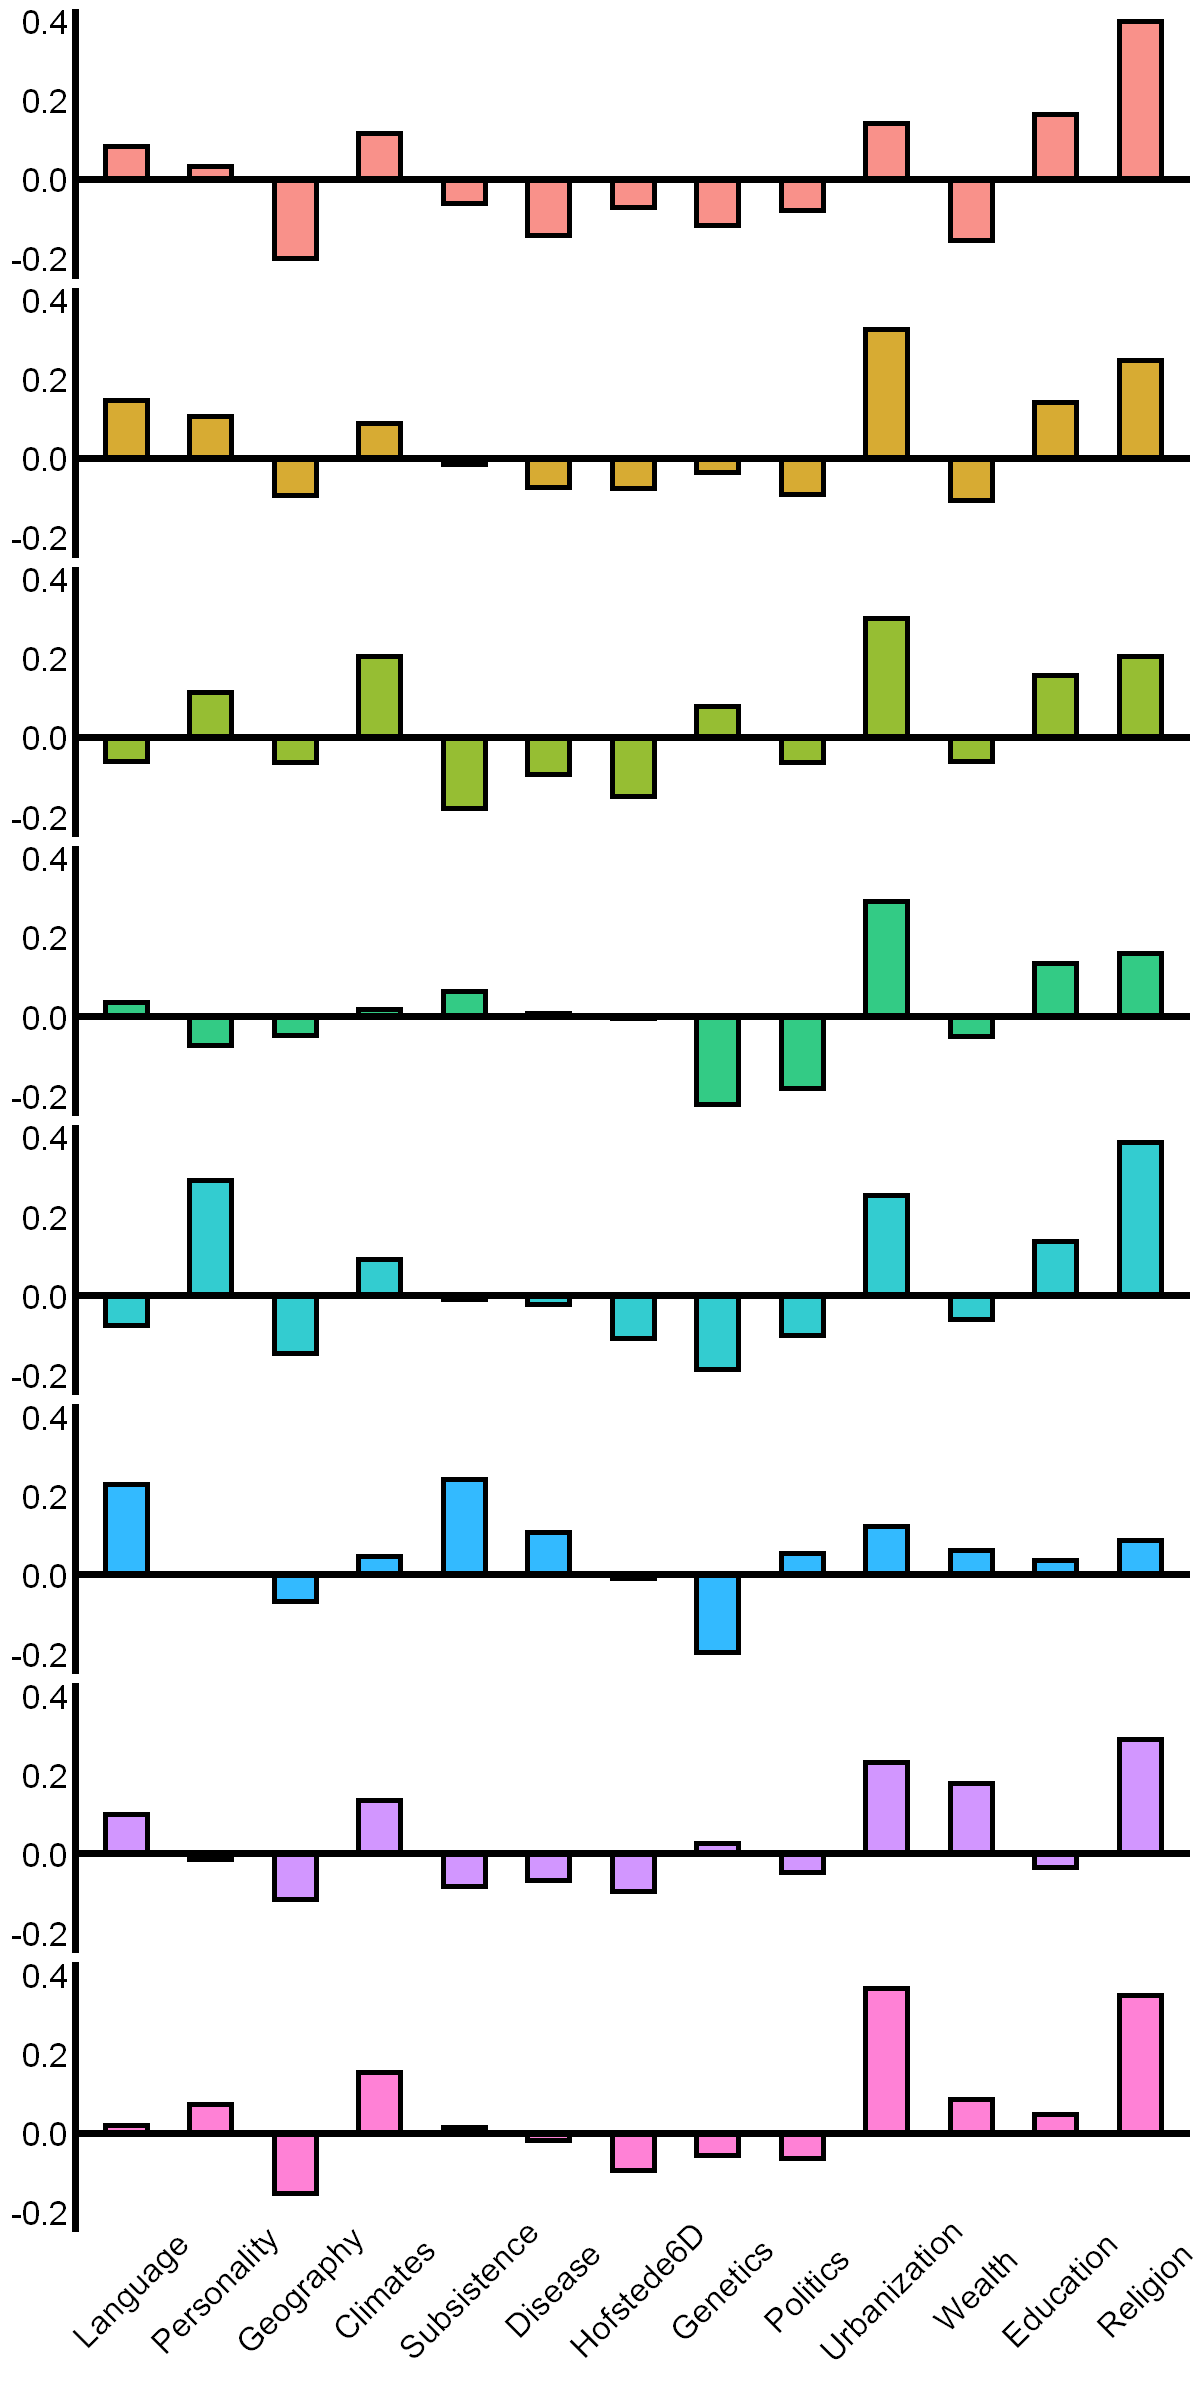

In [5]:
options(repr.plot.width=10,repr.plot.height=20)
ggplot(regression_results_melt,aes(x=predictor,y=value,fill=model))+
geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5)+
facet_grid(model ~ .) +
geom_hline(aes(yintercept=0),size=2)+
geom_vline(aes(xintercept=0),size=1.5)+
theme_classic()+
theme(#axis.text.x=element_blank(),
      #axis.text.y=element_blank(),
      axis.text.x=element_text(size=20,color='black',angle=45,vjust = 0.7),
      axis.text.y=element_text(size=20,color='black'),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      #axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=2),
      axis.line=element_blank(),
      axis.ticks = element_blank(),
      legend.position = 'none',
      strip.text = element_blank()
      )

png("../output_graph/regression/RSA_regression_subvariables.png", bg="transparent",
    family = 'sans',units='in',width=10,height=20,res=300)
ggplot(regression_results_melt,aes(x=predictor,y=value,fill=model))+
geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5)+
facet_grid(model ~ .) +
geom_hline(aes(yintercept=0),size=2)+
geom_vline(aes(xintercept=0),size=1.5)+
theme_classic()+
theme(axis.text=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      #axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=2),
      axis.line=element_blank(),
      axis.ticks = element_blank(),
      legend.position = 'none',
      strip.text = element_blank()
      )
dev.off()